# Grid generation in 2d

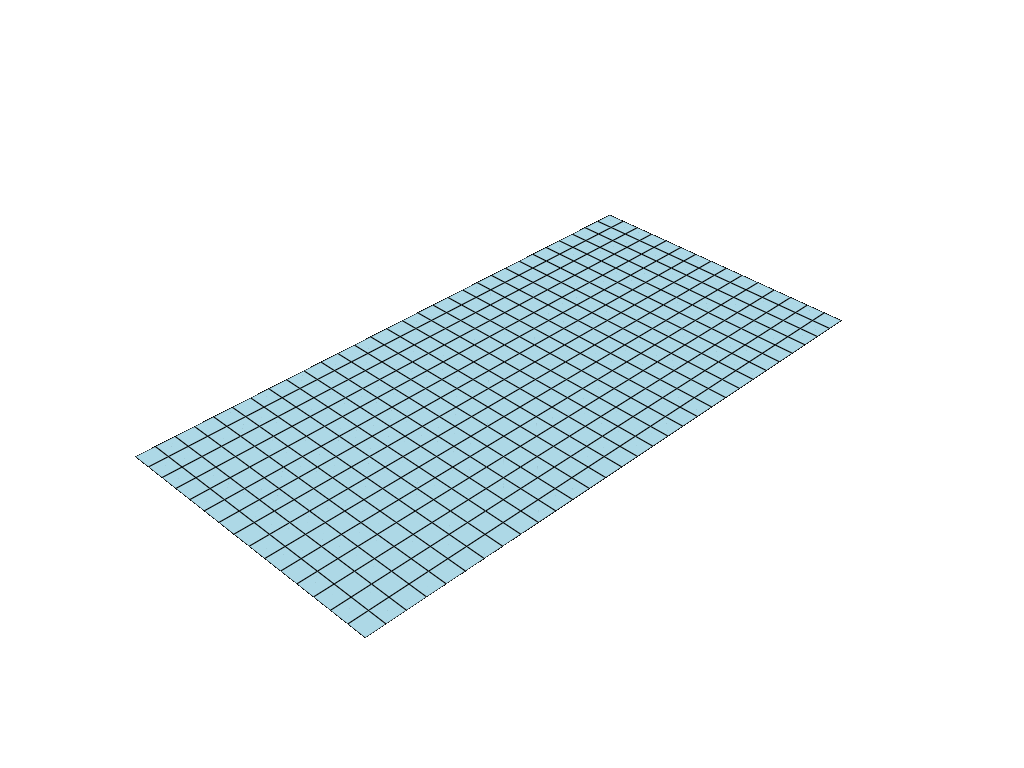

In [1]:
from sigmaepsilon.mesh.grid import grid
from sigmaepsilon.mesh import PolyData, PointData, CartesianFrame
from sigmaepsilon.mesh.cells import Q4 as CellData
import numpy as np

# create a grid of 30 x 15 cells, with 2 x 2 nodes per cell
gridparams = {
    "size": (1200, 600),
    "shape": (30, 15),
    "eshape": (2, 2),
    "path": [0, 2, 3, 1]
}
coords, topo = grid(**gridparams)

# the `grid` function creates a 2d mesh in the x-y plane,
# but we want a 3d mesh, with zero values for the z axis.
coords = np.pad(coords, ((0, 0), (0, 1)), mode='constant')

frame = CartesianFrame(dim=3)

pd = PointData(coords=coords, frame=frame)
cd = CellData(topo=topo, frames=frame)

mesh = PolyData(pd, cd)

mesh.plot(notebook=True, jupyter_backend="static", theme="document")